In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import FunctionTransformer 
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

from sklearn.svm import SVC 
from xgboost.sklearn import XGBClassifier 
import itertools
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import stopwords
#from textblob import Word
from sklearn.ensemble import VotingClassifier 

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline

## Machine Learning


In [4]:
longdata=pd.read_csv('longdata_final.csv',index_col=[1,0])
longdata=longdata.sort_index()
longdata.loc["2015-02-02":"2018-12-31"].loc["2015-02-02":"2018-12-31"]

Industrials  Health Care  Information Technology  \
Dates      Symb                                                     
2015-02-02 A             0.0          1.0                     0.0   
           AAL           1.0          0.0                     0.0   
           AAP           0.0          0.0                     0.0   
           AAPL          0.0          0.0                     1.0   
           ABC           0.0          1.0                     0.0   
...                      ...          ...                     ...   
2018-12-31 XOM           0.0          0.0                     0.0   
           XRAY          0.0          1.0                     0.0   
           YUM           0.0          0.0                     0.0   
           ZBH           0.0          1.0                     0.0   
           ZBRA          0.0          0.0                     1.0   

                 Communication Services  Consumer Discretionary  Utilities  \
Dates      Symb                                                              
2015-02-02 A                        0.0                     0.0        0.0   
           AAL                      0.0                     0.0        0.0   
           AAP                      0.0                     1.0        0.0   
           AAPL                     0.0                     0.0        0.0   
           ABC                      0.0                     0.0        0.0   
...                                 ...                     ...        ...   
2018-12-31 XOM                      0.0                     0.0        0.0   
           XRAY                     0.0                     0.0        0.0   
           YUM                      0.0                     1.0        0.0   
           ZBH                      0.0                     0.0        0.0   
           ZBRA                     0.0                     0.0        0.0   

                 Financials  Materials  Real Estate  Consumer Staples  ...  \
Dates      Symb                                                        ...   
2015-02-02 A            0.0        0.0          0.0               0.0  ...   
           AAL          0.0        0.0          0.0               0.0  ...   
           AAP          0.0        0.0          0.0               0.0  ...   
           AAPL         0.0        0.0          0.0               0.0  ...   
           ABC          0.0        0.0          0.0               0.0  ...   
...                     ...        ...          ...               ...  ...   
2018-12-31 XOM          0.0        0.0          0.0               0.0  ...   
           XRAY         0.0        0.0          0.0               0.0  ...   
           YUM          0.0        0.0          0.0               0.0  ...   
           ZBH          0.0        0.0          0.0               0.0  ...   
           ZBRA         0.0        0.0          0.0               0.0  ...   

                 Net Margin  Total Asset turnover  Return on Equity  DCF Prem  \
Dates      Symb                                                                 
2015-02-02 A       0.134744             -0.208028         -0.347873 -0.058286   
           AAL    -0.428377              0.380191          2.283966 -0.059618   
           AAP    -0.572432              0.696200          0.238881 -0.049277   
           AAPL    0.801074              0.108586          0.563021 -0.058588   
           ABC    -0.968581              4.809040         -0.507843 -0.057593   
...                     ...                   ...               ...       ...   
2018-12-31 XOM    -0.454882             -0.031549         -0.049209 -0.052448   
           XRAY   -3.043773             -0.672860         -0.073522 -0.052380   
           YUM     1.068999              0.221340         -0.075809 -0.052424   
           ZBH    -1.430772             -0.733924         -0.060840 -0.052064   
           ZBRA   -0.273627              0.051662         -0.027386 -0.050229   

                  PE Prem    Growth

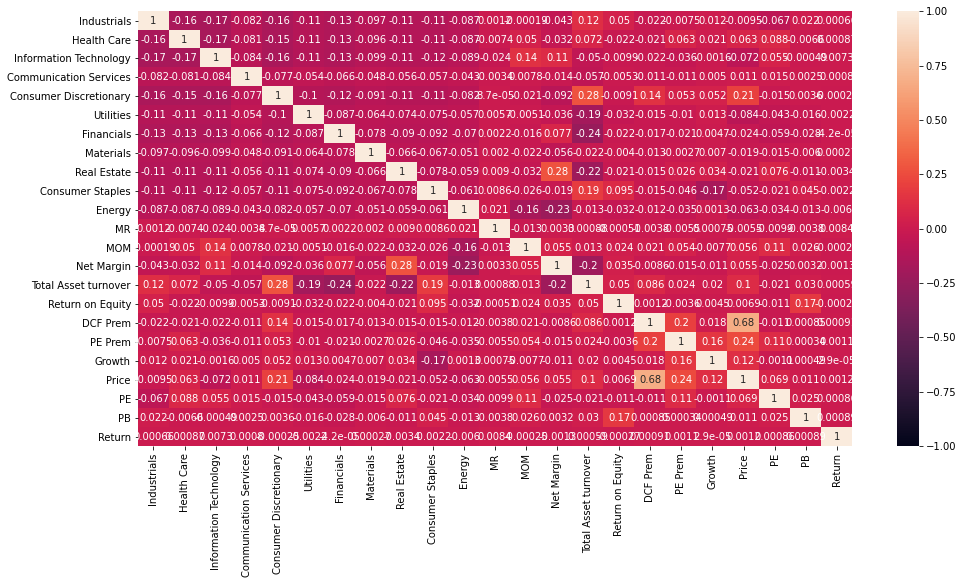

In [5]:
plt.figure(figsize=(16,8))
sns.heatmap(longdata.corr(),vmin=-1, vmax=1,annot=True)

In [6]:
longdata["Excess Return"]=longdata["Return"]-longdata["Return"].groupby(level=0).median()

In [7]:
longdata["Return"].groupby(level=0).median()

Dates
2015-02-02    0.009857
2015-02-03    0.014044
2015-02-04   -0.002583
2015-02-05    0.010077
2015-02-06   -0.003874
                ...   
2020-12-24    0.003315
2020-12-28    0.002205
2020-12-29   -0.005233
2020-12-30    0.004655
2020-12-31    0.008998
Name: Return, Length: 1491, dtype: float64

In [8]:
longdata["Excess Return"]=(longdata["Excess Return"]>0)*1+(longdata["Excess Return"]<0)*0
longdata

Industrials  Health Care  Information Technology  \
Dates      Symb                                                     
2015-02-02 A             0.0          1.0                     0.0   
           AAL           1.0          0.0                     0.0   
           AAP           0.0          0.0                     0.0   
           AAPL          0.0          0.0                     1.0   
           ABC           0.0          1.0                     0.0   
...                      ...          ...                     ...   
2020-12-31 XOM           0.0          0.0                     0.0   
           XRAY          0.0          1.0                     0.0   
           YUM           0.0          0.0                     0.0   
           ZBH           0.0          1.0                     0.0   
           ZBRA          0.0          0.0                     1.0   

                 Communication Services  Consumer Discretionary  Utilities  \
Dates      Symb                                                              
2015-02-02 A                        0.0                     0.0        0.0   
           AAL                      0.0                     0.0        0.0   
           AAP                      0.0                     1.0        0.0   
           AAPL                     0.0                     0.0        0.0   
           ABC                      0.0                     0.0        0.0   
...                                 ...                     ...        ...   
2020-12-31 XOM                      0.0                     0.0        0.0   
           XRAY                     0.0                     0.0        0.0   
           YUM                      0.0                     1.0        0.0   
           ZBH                      0.0                     0.0        0.0   
           ZBRA                     0.0                     0.0        0.0   

                 Financials  Materials  Real Estate  Consumer Staples  ...  \
Dates      Symb                                                        ...   
2015-02-02 A            0.0        0.0          0.0               0.0  ...   
           AAL          0.0        0.0          0.0               0.0  ...   
           AAP          0.0        0.0          0.0               0.0  ...   
           AAPL         0.0        0.0          0.0               0.0  ...   
           ABC          0.0        0.0          0.0               0.0  ...   
...                     ...        ...          ...               ...  ...   
2020-12-31 XOM          0.0        0.0          0.0               0.0  ...   
           XRAY         0.0        0.0          0.0               0.0  ...   
           YUM          0.0        0.0          0.0               0.0  ...   
           ZBH          0.0        0.0          0.0               0.0  ...   
           ZBRA         0.0        0.0          0.0               0.0  ...   

                 Total Asset turnover  Return on Equity  DCF Prem   PE Prem  \
Dates      Symb                                                               
2015-02-02 A                -0.208028         -0.347873 -0.058286 -0.299186   
           AAL               0.380191          2.283966 -0.059618 -0.502251   
           AAP               0.696200          0.238881 -0.049277  0.687751   
           AAPL              0.108586          0.563021 -0.058588 -0.333656   
           ABC               4.809040         -0.507843 -0.057593 -3.725104   
...                               ...               ...       ...       ...   
2020-12-31 XOM              -0.424484         -0.072130 -0.051589  0.017214   
           XRAY             -0.284302         -0.067586 -0.051597 -0.026779   
           YUM              -0.311942         -0.071644 -0.051519  0.060282   
           ZBH              -0.278873         -0.067352 -0.051292 -0.036365   
           ZBRA             -0.227931         -0.055566 -0.043511  0.062676   

                   Growth     Price         PE        PB    R

In [9]:
#Classes are balance
#label 1 means positive excess return, label 0 means negative or 0 excess return
longdata["Excess Return"].sum(axis=0)/longdata["Excess Return"].shape[0]

0.4999556160492366

In [10]:
#longdata.dropna()
longdata.dropna(inplace=True)

In [11]:
X=longdata.iloc[:,:-2]
Y=longdata["Excess Return"]

In [12]:
Xtrain=X.loc["2015-02-02":"2018-12-31"]
Ytrain=Y.loc["2015-02-02":"2018-12-31"]
Xtest=X.loc["2019-01-01":]
Ytest=Y.loc["2019-01-01":]

In [13]:
Xtrain

Industrials  Health Care  Information Technology  \
Dates      Symb                                                     
2015-02-02 A             0.0          1.0                     0.0   
           AAL           1.0          0.0                     0.0   
           AAP           0.0          0.0                     0.0   
           AAPL          0.0          0.0                     1.0   
           ABC           0.0          1.0                     0.0   
...                      ...          ...                     ...   
2018-12-31 XOM           0.0          0.0                     0.0   
           XRAY          0.0          1.0                     0.0   
           YUM           0.0          0.0                     0.0   
           ZBH           0.0          1.0                     0.0   
           ZBRA          0.0          0.0                     1.0   

                 Communication Services  Consumer Discretionary  Utilities  \
Dates      Symb                                                              
2015-02-02 A                        0.0                     0.0        0.0   
           AAL                      0.0                     0.0        0.0   
           AAP                      0.0                     1.0        0.0   
           AAPL                     0.0                     0.0        0.0   
           ABC                      0.0                     0.0        0.0   
...                                 ...                     ...        ...   
2018-12-31 XOM                      0.0                     0.0        0.0   
           XRAY                     0.0                     0.0        0.0   
           YUM                      0.0                     1.0        0.0   
           ZBH                      0.0                     0.0        0.0   
           ZBRA                     0.0                     0.0        0.0   

                 Financials  Materials  Real Estate  Consumer Staples  ...  \
Dates      Symb                                                        ...   
2015-02-02 A            0.0        0.0          0.0               0.0  ...   
           AAL          0.0        0.0          0.0               0.0  ...   
           AAP          0.0        0.0          0.0               0.0  ...   
           AAPL         0.0        0.0          0.0               0.0  ...   
           ABC          0.0        0.0          0.0               0.0  ...   
...                     ...        ...          ...               ...  ...   
2018-12-31 XOM          0.0        0.0          0.0               0.0  ...   
           XRAY         0.0        0.0          0.0               0.0  ...   
           YUM          0.0        0.0          0.0               0.0  ...   
           ZBH          0.0        0.0          0.0               0.0  ...   
           ZBRA         0.0        0.0          0.0               0.0  ...   

                      MOM  Net Margin  Total Asset turnover  Return on Equity  \
Dates      Symb                                                                 
2015-02-02 A    -1.236034    0.134744             -0.208028         -0.347873   
           AAL   1.979888   -0.428377              0.380191          2.283966   
           AAP   0.930309   -0.572432              0.696200          0.238881   
           AAPL  1.764043    0.801074              0.108586          0.563021   
           ABC   0.716376   -0.968581              4.809040         -0.507843   
...                   ...         ...                   ...               ...   
2018-12-31 XOM  -0.311411   -0.454882             -0.031549         -0.049209   
           XRAY -2.730451   -3.043773             -0.672860         -0.073522   
           YUM   0.379633    1.068999              0.221340         -0.075809   
           ZBH  -0.330681   -1.430772             -0.733924         -0.060840   
           ZBRA  2.455067   -0.273627              0.051662         -0.027386   

                 DCF Prem   PE Prem

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Ensemble case ##

In [15]:
clf1 = LogisticRegression(max_iter=5000,class_weight="balanced").fit(Xtrain, Ytrain)
clf = RandomForestClassifier(n_estimators=3000,max_depth=5).fit(Xtrain,Ytrain)
Ypred_prob_train= 0.5*clf1.predict_proba(Xtrain) + 0.5*clf.predict_proba(Xtrain)
#Ypred_prob_train=clf.predict_proba(Xtrain) #in-the-sample

In [16]:
coef=pd.DataFrame([Xtrain.columns.values,clf1.coef_[0]]).T
coef

,0,1
0,Industrials,-0.0100572
1,Health Care,0.0112117
2,Information Technology,0.0509338
3,Communication Services,-0.0119013
4,Consumer Discretionary,-0.00842105
5,Utilities,0.0376619
6,Financials,-0.00245841
7,Materials,-0.0329931
8,Real Estate,0.0533938
9,Consumer Staples,-0.0173389


The coefficients for logistic model is not consistent with the weights given by Linear Moedel.

In [17]:
#coef["Linear"]=[0]*11+list(opt_results.x)
#coef

In [18]:
from sklearn.metrics import confusion_matrix
threshold=.5

Ypred_train=pd.Series(Ypred_prob_train[:,0]<threshold)

Ypred_train.index=Ytrain.index

ActualNeg=sum(Ytrain==0)
ActualPos=sum(Ytrain==1)

TN=sum((Ytrain==0)&(Ypred_train==False))
FP=sum((Ytrain==0)&(Ypred_train==True))
TP=sum((Ytrain==1)&(Ypred_train==True))
FN=sum((Ytrain==1)&(Ypred_train==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

my confusion matrix
        0       1
0  106329   94838
1  100832  100289
Accuracy: 0.513607167004733


In [19]:
TP+FP,FN+TN

(195127, 207161)

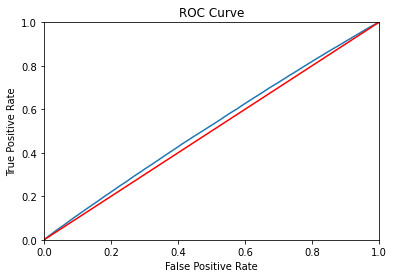

In [20]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(list(Ytrain), list(Ypred_prob_train[:,1]))
import matplotlib.pyplot as plt
%matplotlib inline
lineStart,lineEnd=0,1

plt.figure()
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

### Out-of-Sample

In [21]:
#Ypred_prob=clf.predict_proba(Xtest) #out-of-sample
Ypred_prob = 0.5*clf1.predict_proba(Xtest) + 0.5*clf.predict_proba(Xtest)
threshold=.5

Ypred=pd.Series(Ypred_prob[:,0]<threshold)

Ypred.index=Ytest.index

ActualNeg=sum(Ytest==0)
ActualPos=sum(Ytest==1)

TN=sum((Ytest==0)&(Ypred==False))
FP=sum((Ytest==0)&(Ypred==True))
TP=sum((Ytest==1)&(Ypred==True))
FN=sum((Ytest==1)&(Ypred==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

my confusion matrix
       0      1
0  49941  53083
1  48085  54931
Accuracy: 0.5089885459134149


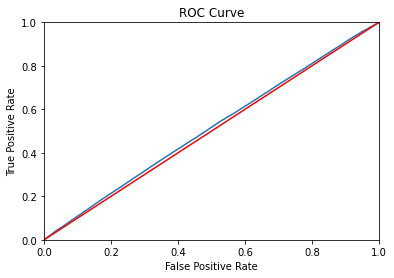

In [22]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(list(Ytest), list(Ypred_prob[:,1]))
import matplotlib.pyplot as plt
%matplotlib inline
lineStart,lineEnd=0,1

plt.figure()
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

#### In Sample Sharpe Ratio

In [23]:
position=Ypred_train*(1)
position.loc[position==0]=position.loc[position==0]-1
rtn_ml=(position*longdata["Return"]).groupby(level=0).sum().loc[:"2019-01-01"]
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(16.507334335588432, 14.728364429959667, 1.1207852992834748)

In [24]:
rtn_ml

Dates
2015-02-02   -1.926688
2015-02-03   -1.351084
2015-02-04    0.815085
2015-02-05   -0.583287
2015-02-06   -2.110116
                ...   
2018-12-24   -1.020323
2018-12-26    0.867769
2018-12-27    0.108280
2018-12-28    0.744842
2018-12-31    0.451253
Length: 986, dtype: float64

#### Out of Sample Sharpe Ratio

In [25]:
position=Ypred*(1)
position.loc[position==0]=position.loc[position==0]-1
position

Dates       Symb
2019-01-02  A      -1
            AAL    -1
            AAP     1
            AAPL    1
            ABC     1
                   ..
2020-12-31  XOM    -1
            XRAY   -1
            YUM    -1
            ZBH    -1
            ZBRA    1
Length: 206040, dtype: int64

In [26]:
#Almost market neutral
position.groupby(level=0).mean()

Dates
2019-01-02    0.053922
2019-01-03    0.068627
2019-01-04    0.058824
2019-01-07    0.063725
2019-01-08    0.058824
                ...   
2020-12-24   -0.024510
2020-12-28   -0.024510
2020-12-29   -0.044118
2020-12-30   -0.053922
2020-12-31   -0.073529
Length: 505, dtype: float64

In [27]:
rtn_ml=(position*longdata["Return"]).groupby(level=0).sum().loc["2019-01-01":]
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(13.453121620375441, 28.469280418195375, 0.47254870592996234)

In [28]:
longdata.columns

Index(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples', 'Energy',
       'MR', 'MOM', 'Net Margin', 'Total Asset turnover', 'Return on Equity',
       'DCF Prem', 'PE Prem', 'Growth', 'Price', 'PE', 'PB', 'Return',
       'Excess Return'],
      dtype='object')

## Only Random Forest ##

In [29]:
Ypred_prob_train= 0.0*clf1.predict_proba(Xtrain) + 1*clf.predict_proba(Xtrain)

## Feature importance ##

In [30]:
import numpy as np
from collections import OrderedDict
importance_dict = {}
importances = clf.feature_importances_

for f in range(Xtrain.shape[1]):
     importance_dict[Xtrain.columns[f]] = round(importances[f],4)

importance_dict_sorted =OrderedDict(sorted(importance_dict.items(), key=lambda item: item[1],reverse=True))  
feature_imp =pd.DataFrame(list(importance_dict_sorted.values()),list(importance_dict_sorted.keys()))

feature_imp.columns = ["importance"]
feature_imp

,importance
MOM,0.1920
MR,0.1250
PB,0.0794
PE,0.0781
Net Margin,0.0711
Total Asset turnover,0.0703
Return on Equity,0.0651
Growth,0.0621
DCF Prem,0.0547
PE Prem,0.0521


In [31]:
from sklearn.metrics import confusion_matrix
threshold=.5

Ypred_train=pd.Series(Ypred_prob_train[:,0]<threshold)

Ypred_train.index=Ytrain.index

ActualNeg=sum(Ytrain==0)
ActualPos=sum(Ytrain==1)

TN=sum((Ytrain==0)&(Ypred_train==False))
FP=sum((Ytrain==0)&(Ypred_train==True))
TP=sum((Ytrain==1)&(Ypred_train==True))
FN=sum((Ytrain==1)&(Ypred_train==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

my confusion matrix
        0      1
0  120874  80293
1  113292  87829
Accuracy: 0.5187900210794257


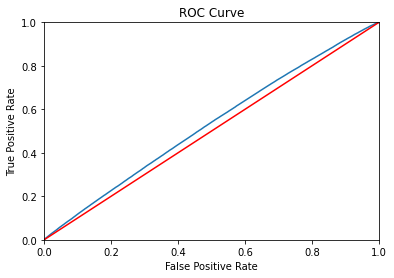

In [32]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(list(Ytrain), list(Ypred_prob_train[:,1]))
import matplotlib.pyplot as plt
%matplotlib inline
lineStart,lineEnd=0,1

plt.figure()
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

In [33]:
#Ypred_prob=clf.predict_proba(Xtest) #out-of-sample
Ypred_prob = 0.0*clf1.predict_proba(Xtest) + 1*clf.predict_proba(Xtest)
threshold=.5

Ypred=pd.Series(Ypred_prob[:,0]<threshold)

Ypred.index=Ytest.index

ActualNeg=sum(Ytest==0)
ActualPos=sum(Ytest==1)

TN=sum((Ytest==0)&(Ypred==False))
FP=sum((Ytest==0)&(Ypred==True))
TP=sum((Ytest==1)&(Ypred==True))
FN=sum((Ytest==1)&(Ypred==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

my confusion matrix
       0      1
0  52492  50532
1  50482  52534
Accuracy: 0.5097359735973598


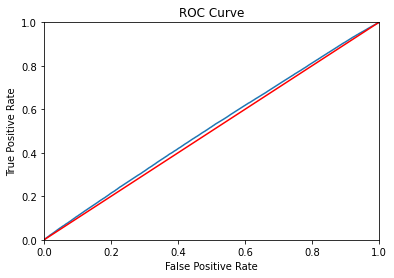

In [34]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(list(Ytest), list(Ypred_prob[:,1]))

lineStart,lineEnd=0,1

plt.figure()
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

## In sample sharpe-ratio ##

In [35]:
position=Ypred_train*(1)
position.loc[position==0]=position.loc[position==0]-1
rtn_ml=(position*longdata["Return"]).groupby(level=0).sum().loc[:"2019-01-01"]
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(22.531475494437785, 16.3403753482438, 1.37888359442486)

In [36]:
position=Ypred*(1)
position.loc[position==0]=position.loc[position==0]-1
position

Dates       Symb
2019-01-02  A      -1
            AAL    -1
            AAP     1
            AAPL    1
            ABC    -1
                   ..
2020-12-31  XOM    -1
            XRAY   -1
            YUM    -1
            ZBH    -1
            ZBRA    1
Length: 206040, dtype: int64

## Out of sample Sharpe ratio ##

In [37]:
rtn_ml=(position*longdata["Return"]).groupby(level=0).sum().loc["2019-01-01":]
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(9.24030944635122, 31.687071688514557, 0.29161134033412456)

## Only logistic regression ##

In [38]:
Ypred_prob_train= 1*clf1.predict_proba(Xtrain) + 0.0*clf.predict_proba(Xtrain)

In [39]:
from sklearn.metrics import confusion_matrix
threshold=.5

Ypred_train=pd.Series(Ypred_prob_train[:,0]<threshold)

Ypred_train.index=Ytrain.index

ActualNeg=sum(Ytrain==0)
ActualPos=sum(Ytrain==1)

TN=sum((Ytrain==0)&(Ypred_train==False))
FP=sum((Ytrain==0)&(Ypred_train==True))
TP=sum((Ytrain==1)&(Ypred_train==True))
FN=sum((Ytrain==1)&(Ypred_train==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

my confusion matrix
        0      1
0  105386  95781
1  101763  99358
Accuracy: 0.5089488127908364


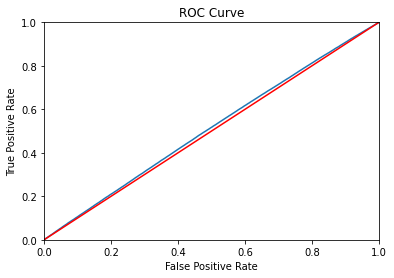

In [40]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(list(Ytrain), list(Ypred_prob_train[:,1]))
import matplotlib.pyplot as plt
%matplotlib inline
lineStart,lineEnd=0,1

plt.figure()
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

In [41]:
#Ypred_prob=clf.predict_proba(Xtest) #out-of-sample
Ypred_prob = 1.0*clf1.predict_proba(Xtest) + 0.0*clf.predict_proba(Xtest)
threshold=.5

Ypred=pd.Series(Ypred_prob[:,0]<threshold)

Ypred.index=Ytest.index

ActualNeg=sum(Ytest==0)
ActualPos=sum(Ytest==1)

TN=sum((Ytest==0)&(Ypred==False))
FP=sum((Ytest==0)&(Ypred==True))
TP=sum((Ytest==1)&(Ypred==True))
FN=sum((Ytest==1)&(Ypred==False))

d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
print("my confusion matrix")
print(d)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))


my confusion matrix
       0      1
0  52867  50157
1  51558  51458
Accuracy: 0.5063337216074548


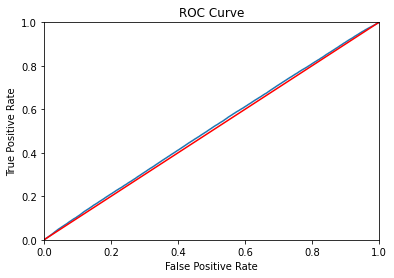

In [42]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(list(Ytest), list(Ypred_prob[:,1]))
import matplotlib.pyplot as plt
%matplotlib inline
lineStart,lineEnd=0,1

plt.figure()
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

## In sample sharpe ratio ##

In [43]:
position=Ypred_train*(1)
position.loc[position==0]=position.loc[position==0]-1
rtn_ml=(position*longdata["Return"]).groupby(level=0).sum().loc[:"2019-01-01"]
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(8.447546116926022, 14.280069857295105, 0.5915619602246214)

## Out of sample sharpe ratio ##

In [44]:
position=Ypred*(1)
position.loc[position==0]=position.loc[position==0]-1
position

Dates       Symb
2019-01-02  A      -1
            AAL    -1
            AAP     1
            AAPL    1
            ABC     1
                   ..
2020-12-31  XOM    -1
            XRAY   -1
            YUM    -1
            ZBH    -1
            ZBRA    1
Length: 206040, dtype: int64

In [45]:
position.groupby(level=0).mean()

Dates
2019-01-02   -0.014706
2019-01-03    0.000000
2019-01-04    0.004902
2019-01-07    0.019608
2019-01-08    0.000000
                ...   
2020-12-24   -0.053922
2020-12-28   -0.039216
2020-12-29   -0.029412
2020-12-30   -0.009804
2020-12-31   -0.019608
Length: 505, dtype: float64

In [46]:
rtn_ml=(position*longdata["Return"]).groupby(level=0).sum().loc["2019-01-01":]
rtn_mean_ml=rtn_ml.mean() * 252 
rtn_std_ml = rtn_ml.std() * 252**0.5
SR_ml = rtn_mean_ml / rtn_std_ml
(rtn_mean_ml,rtn_std_ml,SR_ml)

(3.3624723800735166, 26.590923419877782, 0.12645188461412865)

#### Model evaluation code with more ways of evaluation and some more models ###

In [47]:
# dataframe where we track all cross-validation scoring metrics
df_cv_scores = pd.DataFrame({'model':['dummy'], 'accuracy':[0], 'f1':[0], 'roc_auc':[0]}, 
                            columns=['accuracy','f1','roc_auc'], index=['model'])
df_cv_scores_pca = df_cv_scores.copy()

df_y_pred_probas = pd.DataFrame() 
df_y_preds = pd.DataFrame()

In [48]:

# function adjusts class predictions based on the prediction threshold
def adjust_proba(probs, threshold):
    return [1 if proba >= threshold else 0 for proba in probs]

In [49]:
# function for computing 5-fold cross-validation scoring scores
def predict_evaluate_cv(model, X, y, df_cv_scores):
    cv = StratifiedKFold(n_splits=3, random_state=9999,shuffle=True) 
    score_accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    score_f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()
    score_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
    df_cv_scores.loc[model.__class__.__name__] = [score_accuracy, score_f1, score_auc]
    print('K-fold cross-validation results on validation set:')
    print(" average accuracy is {0:0.2%}".format(score_accuracy))
    print(" average F1 is {0:0.2%}".format(score_f1))
    print(" average roc_auc is {0:0.2%}".format(score_auc))

In [50]:
# function for computing the confusion matrix
def predict_evaluate_cm(model, X, y, threshold=.5):
    model_name = model.__class__.__name__
    classes = ['Negative class', 'Positive class']
    y_true = y
    if model_name == 'SVC':
        y_pred_proba = model.decision_function(X)
    else:
        y_pred_proba = model.predict_proba(X)[:, 1]
    df_y_pred_probas[model_name] = y_pred_proba
    y_pred = adjust_proba(y_pred_proba, threshold)
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float')
    np.set_printoptions(precision=2)
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="gray" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.rcParams["axes.edgecolor"] = "0.85"
    plt.show()

In [51]:
# function for compution the roc plot
def predict_evaluate_roc(model, X, y, threshold=.5):
    y_pred = model.predict(X)
    model_name = model.__class__.__name__
    df_y_preds[model_name] = y_pred
    if model_name == 'SVC':
        y_pred_proba = model.decision_function(X)
    else:
        y_pred_proba = model.predict_proba(X)[:, 1]
    [fpr, tpr, thr] = roc_curve(y, y_pred_proba)

    idx = np.min(np.where(tpr > threshold))
    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

    print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
          "and a specificity of %.3f" % (1-fpr[idx]) + 
          ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [68]:
# global function for fitting, cross-validating and evaluating a given classifier
def fit_predict_evaluate(model, Xtrain, ytrain, Xval, yval, df_cv_scores):
    model.fit(Xtrain, ytrain)
    
    

    
    #predict_evaluate_cv(model, Xtrain, ytrain, df_cv_scores)
    predict_evaluate_cm(model, Xval, yval)
    predict_evaluate_roc(model, Xval, yval)
    
    print(model.__class__.__name__+":")
    print('Accuracy score on training set is {0:0.2%}'.format(model.score(Xtrain, ytrain)))
    #print('Accuracy score on test set is {0:0.2%}'.format(model.score(Xval, yval)))
    
    
    
    
    
    
    threshold = 0.5    
    Ypred_prob_train = model.predict_proba(Xtrain)
    Ypred_train=pd.Series(Ypred_prob_train[:,0]<threshold)
    Ypred_train.index=Ytrain.index
    position=Ypred_train*(1)
    position=position*(408-position.groupby(level=0).sum())/position.groupby(level=0).sum()
    position.loc[position==0]=position.loc[position==0]-1
    rtn_ml=(position*longdata["Return"]).groupby(level=0).sum().loc[:"2019-01-01"]
    rtn_mean_ml=rtn_ml.mean() * 252 
    rtn_std_ml = rtn_ml.std() * 252**0.5
    SR_ml = rtn_mean_ml / rtn_std_ml
    print ("Sharpe ratio(in sample) is : " + str(SR_ml))
    
    

    
    Ypred_prob = model.predict_proba(Xval)
    Ypred=pd.Series(Ypred_prob[:,0]<threshold)
    Ypred.index=yval.index
    position=Ypred*(1)
    position=position*(408-position.groupby(level=0).sum())/position.groupby(level=0).sum()
    position.loc[position==0]=position.loc[position==0]-1
    #position.loc[position==0]=position.loc[position==0]-1
    rtn_ml=(position*longdata["Return"]).groupby(level=0).sum().loc["2019-01-01":]
    rtn_mean_ml=rtn_ml.mean() * 252 
    rtn_std_ml = rtn_ml.std() * 252**0.5
    SR_ml = rtn_mean_ml / rtn_std_ml
    print ("            ")
    print ("            ")
    print ("Sharpe ratio(out of sample) is : " + str(SR_ml))
    
    
    ActualNeg=sum(yval==0)
    ActualPos=sum(yval==1)

    TN=sum((yval==0)&(Ypred==False))
    FP=sum((yval==0)&(Ypred==True))
    TP=sum((yval==1)&(Ypred==True))
    FN=sum((yval==1)&(Ypred==False))

    d=pd.DataFrame(np.matrix([[TN,FP],[FN,TP]]))
    print("confusion matrix for out of sample")
    print(d)
    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
    print("Accuracy:", (TP+TN)/(TN+FP+TP+FN))

    
    
    
    return model

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth = 7,class_weight = "balanced")

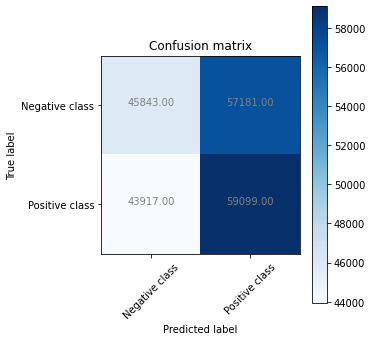

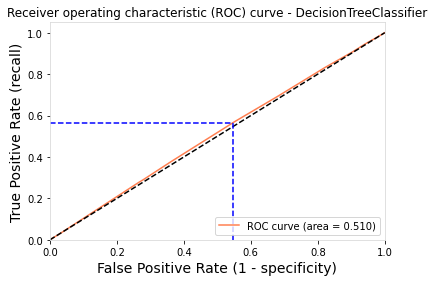

Using a threshold of 0.506 guarantees a sensitivity of 0.566 and a specificity of 0.453, i.e. a false positive rate of 54.73%.
DecisionTreeClassifier:
Accuracy score on training set is 51.43%
Sharpe ratio(in sample) is : 2.4544541359382883
            
            
Sharpe ratio(out of sample) is : 1.1325814782278323
confusion matrix for out of sample
       0      1
0  45843  57181
1  43917  59099
Accuracy: 0.5093282857697534


In [70]:
dt_model = fit_predict_evaluate(dt_model, Xtrain, Ytrain, Xtest, Ytest, df_cv_scores)

In [62]:
Ytest

Dates       Symb
2019-01-02  A       0
            AAL     1
            AAP     1
            AAPL    1
            ABC     1
                   ..
2020-12-31  XOM     0
            XRAY    1
            YUM     0
            ZBH     1
            ZBRA    0
Name: Excess Return, Length: 206040, dtype: int64

In [71]:
xgb_model = XGBClassifier(learningrate =0.05, nestimators=100,
                    maxdepth=4, minchildweight=4, subsample=0.8, colsamplebytree=0.8,
                    objective= 'binary:logistic',
                    nthread=3,
                    scaleposweight=2,
                    seed=27)


[00:45:29] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsamplebytree, learningrate, maxdepth, minchildweight, nestimators, scaleposweight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




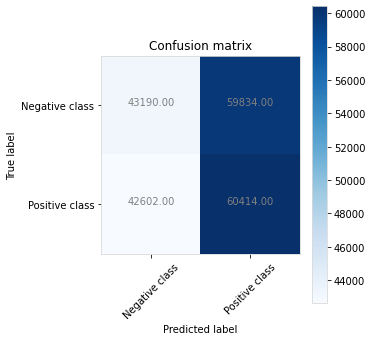

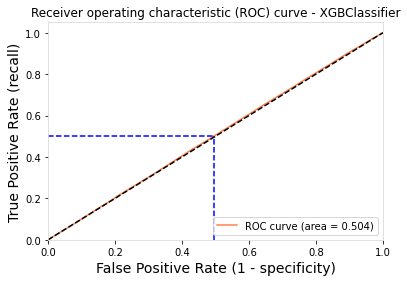

Using a threshold of 0.507 guarantees a sensitivity of 0.500 and a specificity of 0.505, i.e. a false positive rate of 49.48%.
XGBClassifier:
Accuracy score on training set is 57.19%
Sharpe ratio(in sample) is : 19.565862662085447
            
            
Sharpe ratio(out of sample) is : 1.2557887482916936
confusion matrix for out of sample
       0      1
0  43190  59834
1  42602  60414
Accuracy: 0.5028344010871676


In [72]:
xgb_model = fit_predict_evaluate(xgb_model, Xtrain, Ytrain, Xtest, Ytest, df_cv_scores)

In [58]:

svm_model = SVC(gamma=0.1, C=0.01, kernel="linear")

In [ ]:

svm_model = fit_predict_evaluate(svm_model, Xtrain, Ytrain, Xtest, Ytest, df_cv_scores)

## More experimentation of parameters with logistic regression ##

In [75]:
"""
log_reg = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=5
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
    )
"""
log_reg = LogisticRegression(max_iter=5000,class_weight="balanced")

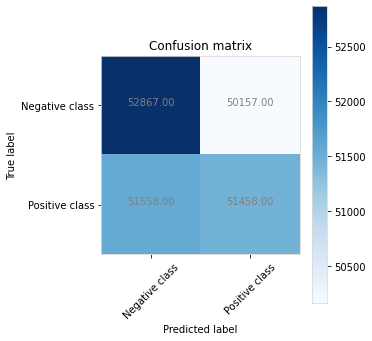

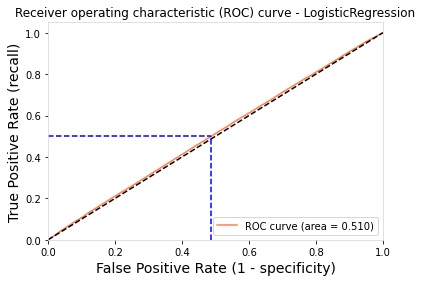

Using a threshold of 0.500 guarantees a sensitivity of 0.500 and a specificity of 0.513, i.e. a false positive rate of 48.74%.
LogisticRegression:
Accuracy score on training set is 50.89%
Sharpe ratio(in sample) is : 0.7009903568548413
            
            
Sharpe ratio(out of sample) is : 0.1108700444868889
confusion matrix for out of sample
       0      1
0  52867  50157
1  51558  51458
Accuracy: 0.5063337216074548


In [76]:
log_reg = fit_predict_evaluate(log_reg, Xtrain, Ytrain, Xtest, Ytest, df_cv_scores)